<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_008_Fowles_CP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

# Fowles, AM Chapter 2
Computer Problem C2.1


질량 70 kg 인 스카이다이버가 지표면으로부터 고도 32 km에서 비행기에서 뛰어내린다. 불행히도 낙하산이 펼쳐지지 않는다. (이하 각 파트에서 수평 운동은 무시하고 초기 속도는 0으로 가정한다.)

**(a)** 공기 저항을 무시하고 중력 가속도 g가 일정하다고 가정하여 지면에 충돌하기까지의 시간을 구하시오. (정밀도 1s)

**(b)** 중력 가속도가 g로 일정하다고 가정하고 공기 저항력이 다음과 같이 작용한다고 가정하고 지면에 충돌하기까지의 시간을 구하시오. (정밀도 1s)

$$ F(v) = -c_2 v \left| v \right|$$

여기서 $c_2$의 값은 낙하하는 사람에 대하여 SI 단위계로 0.5이고 상수이다.

**(c)** $c_2$는 $ H = 8\ \mathrm{km} $가 기준 고도 척도이며, $y$는 지면으로부터의 고도일 때, 고도에 따른 대기 밀도에 따라

$$ c_2 = 0.5 e^{-y/H} $$

와 같이 변한다고 하고, 중력 가속도도 상수가 아니고, 지구의 반지름이 $R_e = 6370\ \mathrm {km}$일 때

$$ g = \dfrac{9.8}{\left( 1 + \dfrac{y}{R_e} \right)^2}\ \mathrm{ms^{-2}} $$

와 같이 고도에 따라 변한다고 할 때 지면에 충돌하기까지의 시간을 구하시오.

**(d)** (c)의 경우에 대하여 스카이다이버의 가속도, 속도, 고도를 시간의 함수로 플롯하시오. 스카이다이버가 떨어질 때 가속도가 양수가 되는 이유를 설명하시오.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
m = 70 # [kg]
g = 9.8 # [m/s^2] 지표 중력 가속도
c2_0 = 0.5
y0 = 32000 # [m] initial height
R = 6.37e6 # [m] radius of Earth
H = 8000 # [m] 특성 고도

### (a) 중력 가속도가 일정하고 공기 저항이 없는 경우

$$ y(t) = h - \frac{1}{2}gt^2 $$

$$ y_0 = y(0) = h $$

$$ y(t_a) = 0$$

$$ 0 = y_0 - \frac{1}{2}g t_a^2 $$

$$ t_a  = \sqrt\frac{2 y_0}{g} $$

In [ ]:
# time of fall-(a)
t_a = np.sqrt(2 * y0 / g)
print(f"{t_a:.0f} s")

81 s


### (b) 중력 가속도가 일정하고 제곱형 저항이 있는 경우

$$m\frac{dv}{dt} = -mg - c_2 v\left|v\right|$$

낙하시 $v \le 0$이므로,
$$\frac{dv}{dt} = -g + \frac{c_2}{m} v^2 = -g\left(1-\frac{v^2}{v_t^2}\right), \left(v_t=\sqrt{\frac{mg}{c_2}}\right),$$

$$ dt = -\frac{v_t du}{g\left(1-u^2\right)} = -\tau\frac{du}{1 - u^2},\space \left(u=\dfrac{v}{v_t},\space\tau=\dfrac{v_t}{g}\right)$$

$$ u = \frac{v}{v_t} = -\tanh\frac{t}{\tau}$$

In [ ]:
vt, tau, t = sym.symbols(r"v_t \tau t")

속도 공식을 적분하여 y(t)를 구한다:

$$v(t) = -v_t \tanh\left(\frac{t}{\tau}\right)$$
$$y(t) - y_0= \int_{0}^{t} v(t)dt$$


In [ ]:
yt = sym.integrate(-vt * sym.tanh(t/tau), (t, 0, t)) + y0
yt

-v_t*(-\tau*log(tanh(t/\tau) + 1) + t) + 32000

특성시간 tau의 값

In [ ]:
TAU = np.sqrt(m/(g*c2_0))
TAU

np.float64(3.779644730092272)

종단 속력

In [ ]:
VT = np.sqrt(m*g/c2_0)
print(f"vt = {VT:.0f} m/s")

vt = 37 m/s


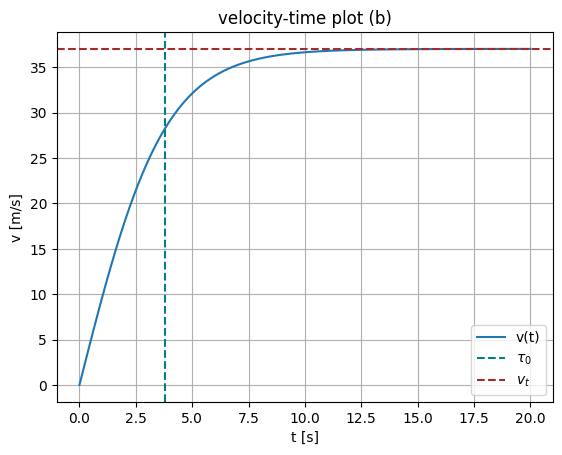

In [ ]:
# 속력-시간 그래프
ts = np.linspace(0, 20, 101)

plt.title("velocity-time plot (b)")
plt.plot(ts, VT*np.tanh(ts/TAU), label="v(t)")
plt.axvline(TAU, c="teal", ls="dashed", label=r"$\tau_0$")
plt.axhline(VT, c="brown", ls="dashed", label=r"$v_t$")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.legend()
plt.show()

In [ ]:
"""
y(t)의 sympy 기호 식을 바탕으로
인자 t를 받아 y값을 반환하는 함수를 생성한다.
"""
yf = sym.lambdify([t], yt.subs({vt:VT, tau:TAU}))

In [ ]:
# 함수의 0점 ('zero' of a function, (즉, f(x)=0 의 근)을 구하는 함수
from scipy.optimize import fsolve

대부분의 낙하시간 동안 종단 속력에 가까운 속력으로 낙하한다고 가정하면 낙하시간은 대략

$$ \frac{x_0}{v_t}  = \frac{32000\ \rm m}{37\ \rm m/s} \approx 864\ {\rm s}$$

일 것이므로 800~900 s 사이에서 낙하시간을 찾는다:

In [ ]:
y0/VT

np.float64(863.9187954496622)

In [ ]:
# time of fall-(b)
# yt_y0(t) = 0, 즉 yf(t) = 0 인 t를 구한다:
t_b = fsolve(yf, [800.0, 900.0])[0]
t_b

np.float64(866.5386455378432)

In [ ]:
# 32000를 낙하하는 데 걸리는 시간:
print(f"t(b) = {t_b:.0f} s")

t(b) = 867 s


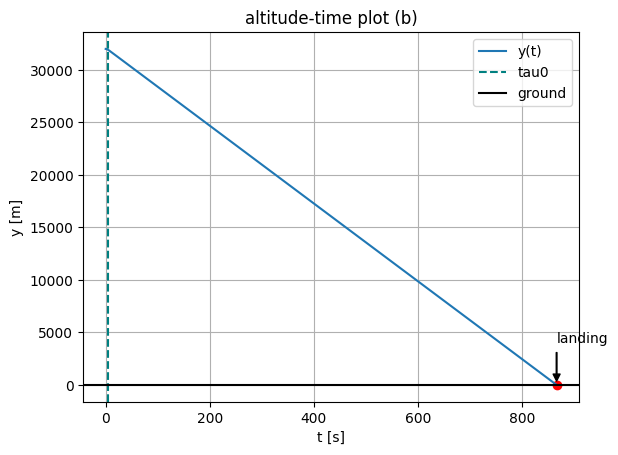

In [ ]:
ts = np.linspace(0, t_b, 500)

plt.title("altitude-time plot (b)")
plt.plot(ts, yf(ts), label="y(t)")

plt.annotate("landing", (t_b, 0),
             xytext=(t_b,4000),
             textcoords="data",
             arrowprops=dict(facecolor="black", shrink=0.1, width=0.5,
                             headwidth=5, headlength=5))
plt.scatter(t_b,0,color='r')

plt.axvline(TAU, c="teal", ls="dashed", label="tau0")
plt.axhline(0, c="k", label="ground")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.legend()

### (c) 뉴턴 중력 법칙에 따라 높이에 따라 중력 가속도가 변하고, 높이에 따른 공기의 밀도 변화를 반영한 제곱형 저항이 작용하는 경우 :

중력:

$$ g(x) = -\frac{g}{(1+y/R)^2}$$

높이에 따라 공기의 밀도가 변하는 데 따른 공기저항 계수의 변화:

$$ c_2(y) = c_2(0) e^{-y/H} = 0.5 e^{-y/H}$$

공기 저항에 의한 가속도(낙하시):

$$ d(y,v) = +\frac{c_2}{m} e^{-y/H} v^2$$

In [ ]:
def f(t, S):
  """
  물체의 운동 상태를 입력받아 상태의 변화율을 반환하는 함수
  """
  y, v = S
  gy = -g / (1 + y/R)**2
  dyv = c2_0/m * np.exp(-y/H) * v**2
  return (v, gy + dyv)

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
"""
수치적 해석으로 낙하 운동을 모사한다.
"""
sol = solve_ivp(f, (0, 900.0), [y0, 0], method = "RK45", t_eval=np.linspace(0,900,9001), max_step=0.1)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  8.999e+02  9.000e+02]
        y: [[ 3.200e+04  3.200e+04 ... -1.265e+04 -1.265e+04]
            [ 0.000e+00 -9.702e-01 ... -1.685e+01 -1.685e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 54020
     njev: 0
      nlu: 0

In [ ]:
# sol.t를 tcs로
tc = sol.t
# sol.y를 고도와 속도의 배열로 분해한다
yc, vc = sol.y

In [ ]:
yc[-1]

np.float64(-12650.265637831018)

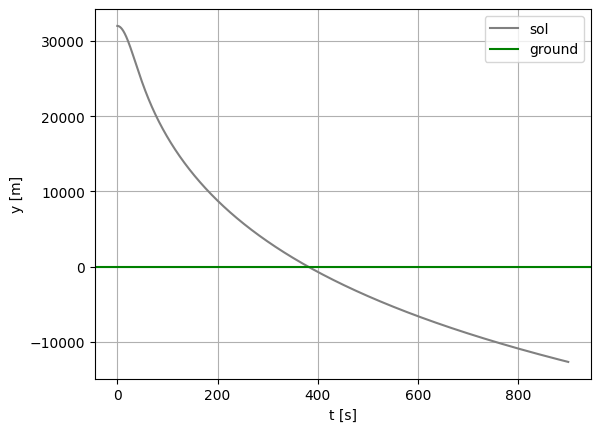

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.plot(tc, yc, c="gray", label="sol")
plt.axhline(0, c="green", label="ground")
plt.legend()

In [ ]:
list = [1, 0, -1, 2, 3, -4]
sgn = np.sign(list)
dd = np.diff(sgn)


In [ ]:
sgn

array([ 1,  0, -1,  1,  1, -1])

In [ ]:
dd

array([-1, -1,  2,  0, -2])

In [ ]:
"""
yc, 즉  고도 값이 양에서 음으로 바뀌기 직전 지점의 인덱스를 구한다.
구체적으로는, sign('signum'), diff, where 를 순차적으로 적용하여
yc의 부호가 바뀌는 지점 근처의 배열 색인(index)을 구한다.
"""
y0at, = np.where(np.diff(np.sign(yc)) != 0)
iy = int(y0at[0])
iy

3811

In [ ]:
yc[iy+1]

np.float64(-0.3558012412636442)

In [ ]:
"""
iy 전후에서 yc 즉 고도 값이 어떻게 변하는지 확인해 본다
"""
yc[iy-5:iy+5]

array([ 21.98220697,  18.25702517,  14.53271609,  10.80927932,
         7.08671445,   3.36502107,  -0.35580124,  -4.07575289,
        -7.79483428, -11.51304583])

In [ ]:
"""
이 시점의 시각을 확인해 본다
"""
print(f"sol.t[iy] = {sol.t[iy]:.0f} s")
print(f"yc[iy] = {yc[iy]:.0f} m")

sol.t[iy] = 381 s
yc[iy] = 3 m


In [ ]:
len(sol.t)

9001

In [ ]:
from numpy import polyfit, poly1d, polyder

In [ ]:
""""
iy 근처의 값을 이용하여 부호가 바뀌는 점에 대하여
다항식을 생성한다.
"""
di = 1000
pci = polyfit(sol.t[iy-di:iy+di], yc[iy-di:iy+di], 5)

In [ ]:
pfi = poly1d(pci)

In [ ]:
tfit = sol.t[iy-di:iy+di]
yfit = pfi(tfit)

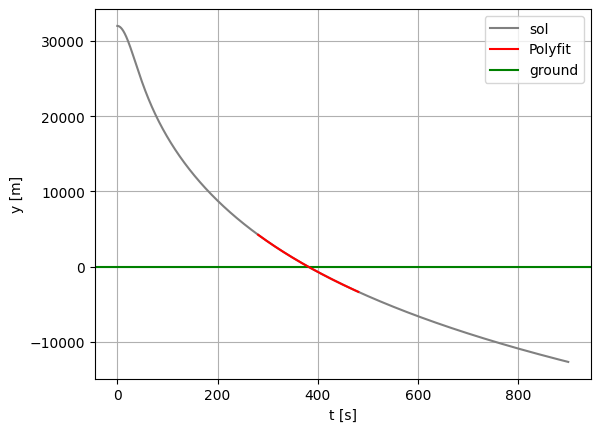

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.plot(sol.t, yc, c="gray", label="sol")
plt.plot(tfit, yfit, c='r', label="Polyfit", ls="-", zorder=5)
plt.axhline(0, c="green", label="ground")
plt.legend()

In [ ]:
"""
y = 0 일 때 t의 값
"""
tsol = fsolve(pfi, 381)
tsol

array([381.19073578])

In [ ]:
# time of fall-(c)
t_c = tsol[0]
print(f"t(c) = {t_c:.0f} s")

t(c) = 381 s


**(d)** For case (c), plot the plot the acceleration, velociy, and altitude of the parachutist as a function of time.

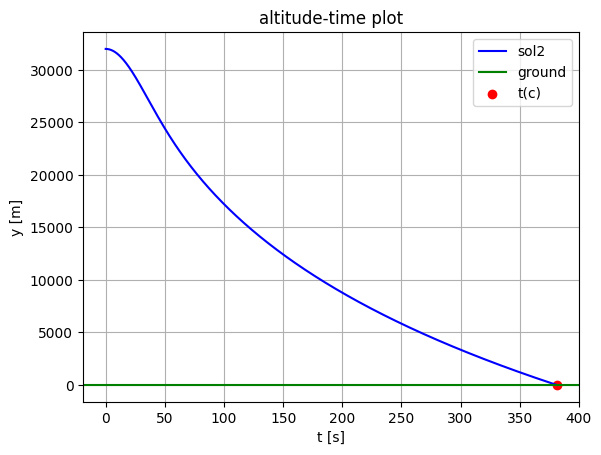

In [ ]:
plt.title("altitude-time plot")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
plt.plot(tc[:iy+2], yc[:iy+2], c="blue", label="sol2")
plt.axhline(0, c="green", label="ground")
plt.scatter(t_c, 0, c="red", label="t(c)")
plt.legend()

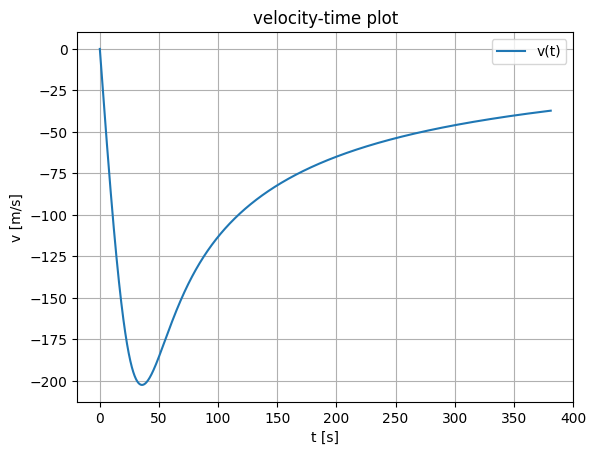

In [ ]:
# 속도-시간 그래프
# iy 와 iy+1 번째 시간 사이에 착지하므로, iy+1 까지 플로팅해 본다.
plt.title("velocity-time plot")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.plot(tc[:iy+2], vc[:iy+2], label="v(t)")
plt.legend()

In [ ]:
# iy 인 순간의 속도
vc[iy]

np.float64(-37.21257777955246)

In [ ]:
dv = np.diff(vc)
dt = np.diff(tc)
ac = dv/dt

In [ ]:
acc = [f(0, [yc[i], vc[i]])[1] for i in range(len(tc))]

In [ ]:
acc[-1]

np.float64(0.017729273625775477)

In [ ]:
ac[0]

np.float64(-9.702234460806025)

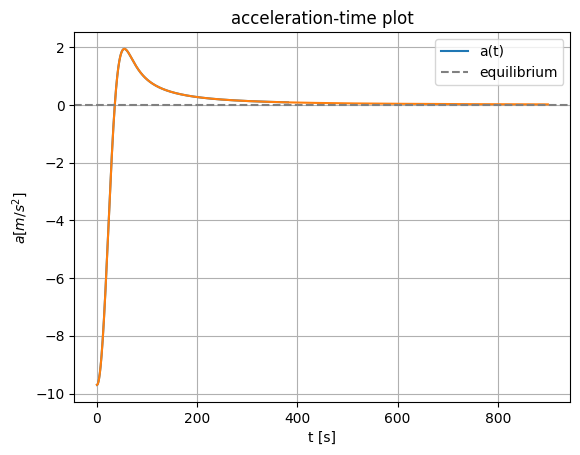

In [ ]:
plt.title("acceleration-time plot")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel(r"$a [m/s^2]$")
plt.plot(tc[:iy+2], ac[:iy+2], label="a(t)")
plt.plot(tc, acc)
plt.axhline(0, c="gray", ls="--", label="equilibrium")
plt.legend()

In [ ]:
# 모델 (a), (b), (c)에서 예상 낙하시간 비교:
print(f"t(a) = {t_a:.0f} | t(b)={t_b[0]:.0f} | t(c)={t_c:.0f}")

In [ ]:
print(t_a < t_c < t_b)

True


*(d)...* Explain why the acceleration becomes positive as the parachutist falls

In [ ]:
# 가속도가 0을 지나는 index
a0at, = np.where(np.diff(np.sign(ac)) != 0)
ia = int(a0at[0])
ia

356

* Compare change of terminal velocity to the actual velocity vs. time

$$c_2(y) = c_2(0) e^{-y/H}$$

$$ v_t(y) = \sqrt{\frac{mg}{c_2(y)}} $$

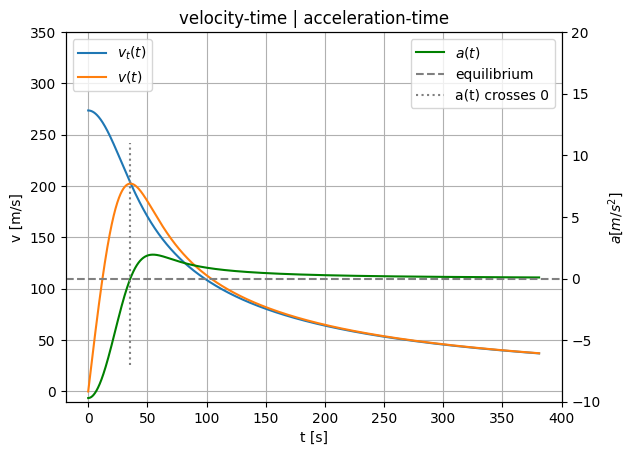

In [ ]:
c2_y = c2_0 * np.exp(-yc/H)
vt_y = np.sqrt(m*g/c2_y)

plt.title("velocity-time | acceleration-time")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")
plt.ylim(-10,350)

plt.plot(tc[:iy], vt_y[:iy], label=r"$v_t(t)$")
plt.plot(tc[:iy], np.abs(vc[:iy]), label=r"$v(t)$")

plt.legend(loc="upper left")

plt.y2=plt.gca().twinx()
plt.y2.set_ylim(-10, 20)

plt.y2.plot(sol.t[:iy], ac[:iy], label=r"$a(t)$", c="green")

plt.y2.axhline(0, c="gray", ls="--", label="equilibrium")
plt.y2.set_ylabel(r"$a [m/s^2]$")
plt.y2.axvline(tc[ia], ls=':', color='gray', label='a(t) crosses 0', ymin=0.1, ymax=0.7)
plt.y2.legend(loc="upper right")